In [1]:
#analysis of returns of major Pharma companies in India with data obtained from yahoo finance
import pandas as pd
from pandas_datareader import data
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import cufflinks as cf
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
import plotly.graph_objs as go
init_notebook_mode(connected=True)
cf.go_offline()
                   

In [2]:
import pandas as pd
from pandas_datareader import data

symbol = 'DRREDDY.NS'
data_source='yahoo'
start_date = '2009-01-01'
end_date = '2019-12-31'

dfreddy = data.DataReader(symbol, data_source, start_date, end_date)



In [3]:
symbol = 'CIPLA.NS'
data_source='yahoo'
start_date = '2009-01-01'
end_date = '2019-12-31'

dfcipla = data.DataReader(symbol, data_source, start_date, end_date)

In [4]:
symbol = 'SUNPHARMA.NS'
data_source='yahoo'
start_date = '2009-01-01'
end_date = '2019-12-31'

dfsunpharma = data.DataReader(symbol, data_source, start_date, end_date)

In [5]:
df = pd.concat([dfreddy,dfcipla,dfsunpharma],keys=['DR REDDY','CIPLA','SUN PHARMA'],names=['CompanyName','Date'])
df.head()

High         Low        Open       Close  \
CompanyName Date                                                         
DR REDDY    2009-01-02  474.350006  466.000000  470.500000  468.000000   
            2009-01-05  478.000000  468.000000  475.000000  471.250000   
            2009-01-06  492.000000  468.100006  474.500000  486.700012   
            2009-01-07  506.000000  452.350006  499.850006  464.899994   
            2009-01-09  488.799988  455.000000  466.000000  459.899994   

                          Volume   Adj Close  
CompanyName Date                              
DR REDDY    2009-01-02  317223.0  425.622650  
            2009-01-05  200154.0  428.578400  
            2009-01-06  702599.0  442.629364  
            2009-01-07  759716.0  422.803375  
            2009-01-09  227697.0  418.256165

In [6]:

##df.loc[(['SBI','HDFC','ICICI','AXIS'],['2009-01-02','2020-04-09']),['Close','Volume']]
df1 = df.reset_index( drop=False)

df1.head()

,CompanyName,Date,High,Low,Open,Close,Volume,Adj Close
0,DR REDDY,2009-01-02,474.350006,466.000000,470.500000,468.000000,317223.0,425.622650
1,DR REDDY,2009-01-05,478.000000,468.000000,475.000000,471.250000,200154.0,428.578400
2,DR REDDY,2009-01-06,492.000000,468.100006,474.500000,486.700012,702599.0,442.629364
3,DR REDDY,2009-01-07,506.000000,452.350006,499.850006,464.899994,759716.0,422.803375
4,DR REDDY,2009-01-09,488.799988,455.000000,466.000000,459.899994,227697.0,418.256165


c:\users\hi\appdata\local\programs\python\python37-32\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning:

Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()



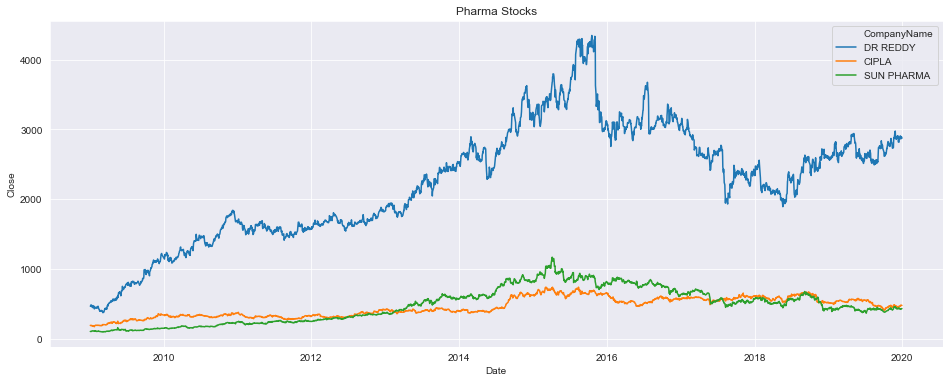

In [7]:
# this is for seaborn plots. 

import matplotlib.pyplot as plt
sns.set_style("darkgrid")
plt.figure(figsize=(16, 6))
bankplot=sns.lineplot(x='Date',y='Close',hue='CompanyName', data=df1 )
bankplot.set_title('Pharma Stocks')
bankplot


In [8]:
#this is for plotly plots

df1.iplot(kind='line',x='Date',y='Close',categories='CompanyName',mode='lines')

In [9]:
yearlist=[2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019]
datelist=list(df1[df1['Date']=='2009-01-02']['Date'].unique())
returns=pd.DataFrame()
#returns=pd.
for i in yearlist:
    datelist.append(df1[df1['Date'].apply(lambda x:x.year)==i]['Date'].max())
    
for j in datelist:
    returns =pd.concat([returns,df1[df1['Date']==j][['CompanyName','Date','Adj Close']]])
returns.reset_index(inplace=True,drop=True)
returns.rename(columns={'Adj Close':'Price'},inplace=True)
companylist=returns['CompanyName'].unique()
returns_pct_change=pd.DataFrame()
returns.set_index(['CompanyName','Date'],inplace=True)
return_pct_change=pd.DataFrame()
for k in  companylist:
    return_pct_change = pd.concat([return_pct_change,returns.loc[k].pct_change()],axis=1)
    return_pct_change.rename(columns={'Price':k},inplace=True)
    
return_pct_change.to_excel('Pharma_Returns.xlsx','Pharma')


    



In [10]:
yearlist=[2019]
datelist=list(df1[df1['Date']=='2009-01-02']['Date'].unique())
returns=pd.DataFrame()
#returns=pd.
for i in yearlist:
    datelist.append(df1[df1['Date'].apply(lambda x:x.year)==i]['Date'].max())
    
for j in datelist:
    returns =pd.concat([returns,df1[df1['Date']==j][['CompanyName','Date','Adj Close']]])
returns.reset_index(inplace=True,drop=True)
returns.rename(columns={'Adj Close':'Price'},inplace=True)
companylist=returns['CompanyName'].unique()
returns_pct_change=pd.DataFrame()
returns.set_index(['CompanyName','Date'],inplace=True)
return_pct_change_absolute=pd.DataFrame()
for k in  companylist:
    return_pct_change_absolute = pd.concat([return_pct_change_absolute,returns.loc[k].pct_change()],axis=1)
    return_pct_change_absolute.rename(columns={'Price':k},inplace=True)
    

return_pct_change_absolute.to_excel('Pharma_Returns_absolute.xlsx','Pharma')


    

